In [5]:
import os
os.chdir('../src/ml') if os.getcwd().endswith('notebooks') else None

from load_matrix import load_df
from model_trainer import MLModel

SVM is not able to train these 2 datasets:

- RGCN protein embeddings
- concatenated protein embeddings (RGCN + ComplEx)

Trying to find the issue

In [6]:
df=load_df('RGCN_protein_embeddings')

In [7]:
from sklearn.model_selection import train_test_split
y=df['disease_status'].values
X=df.drop(columns=['disease_status']).values

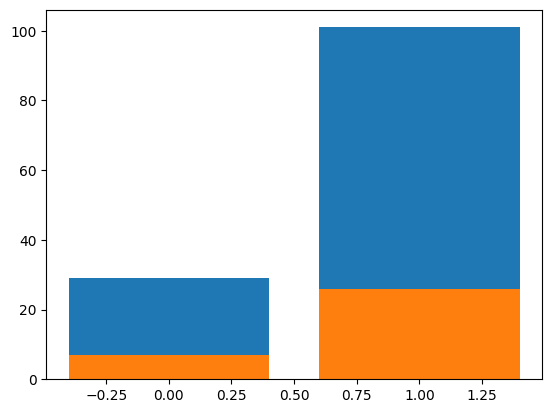

In [4]:
# -- distribution of classes with stratification
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

import matplotlib.pyplot as plt
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)

unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)

plt.show()

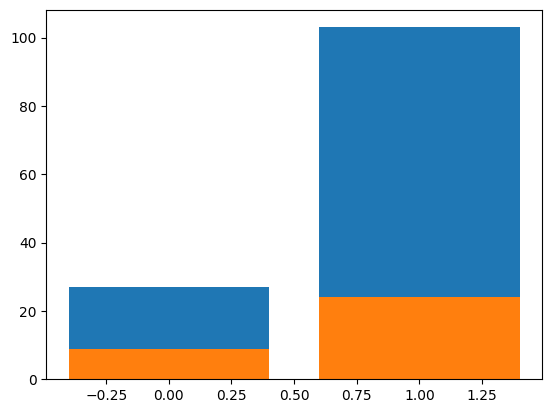

In [8]:
# -- without stratification
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)
plt.show()

similar almost, will leave it like this since we re using 42 as random state everywhere

In [ ]:
from sklearn.svm import SVC

model=SVC(kernel='linear', max_iter=10000) # -- minimal default svm to test
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [1]:
# -- replicating the experiment we had in MLModel

from sklearn.svm import SVC

SVM_HYPERPARAMS = {'kernel': ['linear', 'rbf']}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    SVC(),  # stop if convergence takes too long
    SVM_HYPERPARAMS,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined